In [ ]:
# Importing the dataset
# import the dataset named Position_Salaries
# Importing the libraries numpy and pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Import scikit learn library for Linear Regression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [ ]:
## USA housing data
from google.colab import files
uploaded = files.upload()

Saving USA_Housing_3rdLAb.csv to USA_Housing_3rdLAb.csv


In [ ]:
# Read the data and drop unnecessary column (address column) using dataframe.drop and plot first five rows to confirm
housing_data = pd.read_csv('USA_Housing_3rdLAb.csv')
housing_data.drop(['Address'],axis=1,inplace=True)
housing_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


MultiVariate Linear Regression (USA Housing Data)

In [ ]:
# make a data frame X with all columns except price and Y with Price column
X = housing_data.iloc[:,:-1]
y = housing_data['Price']

X.head()



,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [ ]:
# divide the data set samples into train and test data samples using train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0);
print(X_train)
print(type(X))

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
2913      80196.242251             6.675697                   7.275193   
3275      74130.606324             6.919663                   8.266994   
775       67384.000373             7.224281                   7.809919   
217       59569.537340             6.279537                   7.325380   
1245      58385.215373             7.588559                   6.406118   
...                ...                  ...                        ...   
4931      77622.958116             6.738014                   6.043040   
3264      80051.847123             5.872678                   6.019018   
1653      67094.197072             5.346437                   7.374607   
2607      52541.319847             4.885243                   7.225522   
2732      86762.882864             6.530193                   5.106962   

      Avg. Area Number of Bedrooms  Area Population  
2913                          3.17     48694.864144  
327

In [ ]:
# create Linear Regression object and Train the data model using object.fit method 
hypothesis = LinearRegression()
hypothesis.fit(X_train,y_train)
#displaying the theta1 and theta0


LinearRegression()

In [ ]:
# Display the updated value of theta0 and and other parameters and also make a dataframe having column names in X as dataframe index and coefficients/parameters as column name
print(hypothesis.intercept_)
print(hypothesis.coef_)

-2646630.5310569583
[2.16604083e+01 1.65809651e+05 1.20329408e+05 2.19309558e+03
 1.52858855e+01]


In [ ]:
# make the best hypothesis for given training data samples using object.predict method
X_train_pridict = hypothesis.predict(X_train)
print(X_train_pridict)

[1824063.69391934 1871944.87848624 1712410.22597615 ... 1048618.24581793
  808586.12943648 1664071.80747203]


In [ ]:
# Predict the hypothesis for given test data samples using hypothesis.predict
X_test_predict = hypothesis.predict(X_test)

In [ ]:
# print MAE, MSE and RMSE
MAE = metrics.mean_absolute_error(y_test, X_test_predict, sample_weight=None, multioutput='uniform_average')
print(MAE)
MSE = metrics.mean_squared_error(y_test, X_test_predict, sample_weight=None, multioutput='uniform_average')
print(MSE)
from math import sqrt
RMSE = sqrt(MSE)
print(RMSE)


82657.94605892817
10549721686.161526
102711.83810136748


Polynomial Regression 

In [ ]:
# import the dataset named Position_Salaries 
from google.colab import files
uploaded = files.upload()


Saving Position_Salaries_4thlab.csv to Position_Salaries_4thlab (1).csv


In [ ]:
# Read the data and put second column in X and last column in Y
import pandas as pd
dataset = pd.read_csv('Position_Salaries_4thlab (1).csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [ ]:
# create an object of linear regression class and Train the data model using object.fit method 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
# import PolynomialFeatures class
# create an object of PolynomialFeatures class
# use object.fit_transform to form plynomial features and print them
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

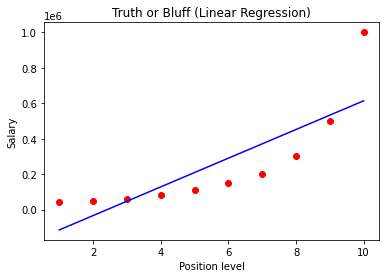

In [ ]:
# Visualising the Linear Regression results

plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


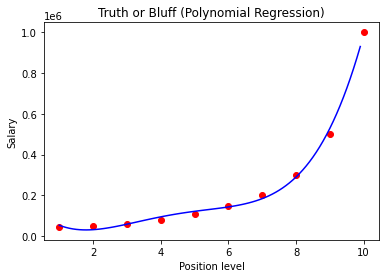

In [ ]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
